## Time Series Model Creation for Chicago Monthly Temperatures

In [27]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [28]:
## Load Data

data = pd.read_csv('/Users/mtetkosk/Google Drive/School/Winter 2017/CSC 425/Project/Time_Series_Temp_Prediction/data/raw/GlobalLandTemperatures/GlobalLandTemperaturesByMajorCity.csv')

print data.shape
data.head()

(239177, 7)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [29]:
## I want to focus just on Chicago

chicago_data = data[data['City'] == 'Chicago']

print chicago_data.shape
chicago_data.head()

(3239, 7)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
51674,1743-11-01,5.436,2.205,Chicago,United States,42.59N,87.27W
51675,1743-12-01,NaN,NaN,Chicago,United States,42.59N,87.27W
51676,1744-01-01,NaN,NaN,Chicago,United States,42.59N,87.27W
51677,1744-02-01,NaN,NaN,Chicago,United States,42.59N,87.27W
51678,1744-03-01,NaN,NaN,Chicago,United States,42.59N,87.27W


In [44]:
## Looks like there are some Nan values to clean out. Let's look only at data with no NaN values

chicago_subset = chicago_data[(chicago_data.AverageTemperature.isnull() == False)].copy()

print chicago_subset.shape
chicago_subset.head()

(3141, 7)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
51674,1743-11-01,5.436,2.205,Chicago,United States,42.59N,87.27W
51679,1744-04-01,8.766,2.357,Chicago,United States,42.59N,87.27W
51680,1744-05-01,11.605,2.102,Chicago,United States,42.59N,87.27W
51681,1744-06-01,17.965,1.989,Chicago,United States,42.59N,87.27W
51682,1744-07-01,21.680,1.786,Chicago,United States,42.59N,87.27W


In [45]:
chicago_subset.columns

Index([u'dt', u'AverageTemperature', u'AverageTemperatureUncertainty', u'City',
       u'Country', u'Latitude', u'Longitude'],
      dtype='object')

Now change the 'dt' column from string to datetime

In [46]:
dates = chicago_subset['dt'].map(lambda x: pd.datetime.strptime(x, '%Y-%m-%d'))
dates.head()

51674   1743-11-01 00:00:00
51679   1744-04-01 00:00:00
51680   1744-05-01 00:00:00
51681   1744-06-01 00:00:00
51682   1744-07-01 00:00:00
Name: dt, dtype: datetime64[ns]

In [47]:
# Assign dates to the 'dt' column
chicago_subset['dt'] = dates

In [48]:
# Check out the dataset now
chicago_subset.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
51674,1743-11-01 00:00:00,5.436,2.205,Chicago,United States,42.59N,87.27W
51679,1744-04-01 00:00:00,8.766,2.357,Chicago,United States,42.59N,87.27W
51680,1744-05-01 00:00:00,11.605,2.102,Chicago,United States,42.59N,87.27W
51681,1744-06-01 00:00:00,17.965,1.989,Chicago,United States,42.59N,87.27W
51682,1744-07-01 00:00:00,21.680,1.786,Chicago,United States,42.59N,87.27W


Now let's plot the time series

In [49]:
chicago_subset = chicago_subset.set_index('dt')
chicago_subset.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1743-11-01 00:00:00,5.436,2.205,Chicago,United States,42.59N,87.27W
1744-04-01 00:00:00,8.766,2.357,Chicago,United States,42.59N,87.27W
1744-05-01 00:00:00,11.605,2.102,Chicago,United States,42.59N,87.27W
1744-06-01 00:00:00,17.965,1.989,Chicago,United States,42.59N,87.27W
1744-07-01 00:00:00,21.680,1.786,Chicago,United States,42.59N,87.27W


For interpretation, convert AverageTemperature to Fahrenheit

In [64]:
chicago_subset['AverageTemperature_F'][1]*1.8+32

47.778800000000004

In [65]:
temp_f = chicago_subset['AverageTemperature'].map(lambda x: x*1.8+32)

In [66]:
temp_f.head()

dt
1743-11-01 00:00:00    41.7848
1744-04-01 00:00:00    47.7788
1744-05-01 00:00:00    52.8890
1744-06-01 00:00:00    64.3370
1744-07-01 00:00:00    71.0240
Name: AverageTemperature, dtype: float64

In [67]:
chicago_subset['AverageTemperature_F'] = temp_f

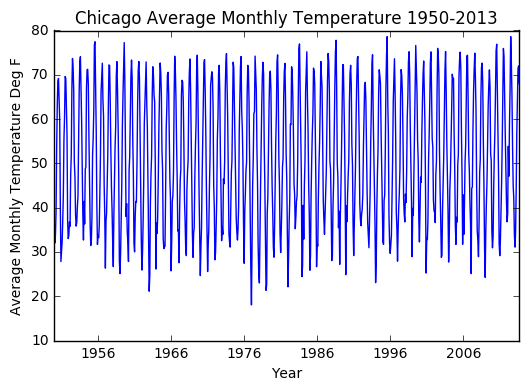

In [75]:
plt.plot(chicago_subset['AverageTemperature_F']['1950-01-01 00:00:00': ])
plt.xlabel('Year')
plt.ylabel('Average Monthly Temperature Deg F')
plt.title('Chicago Average Monthly Temperature 1950-2013')

From plot above, the time series appears to be stationary. Let's do a stationarity check

In [76]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [81]:
chicago_post_1950 = chicago_subset['1950-01-01 00:00:00': ].copy()
print chicago_post_1950.shape
chicago_post_1950.head()

(765, 7)


,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,AverageTemperature_F
dt,,,,,,,
1950-01-01,2.501,0.252,Chicago,United States,42.59N,87.27W,36.5018
1950-02-01,0.008,0.252,Chicago,United States,42.59N,87.27W,32.0144
1950-03-01,0.983,0.321,Chicago,United States,42.59N,87.27W,33.7694
1950-04-01,3.874,0.357,Chicago,United States,42.59N,87.27W,38.9732
1950-05-01,11.718,0.309,Chicago,United States,42.59N,87.27W,53.0924


/Users/mtetkosk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/mtetkosk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


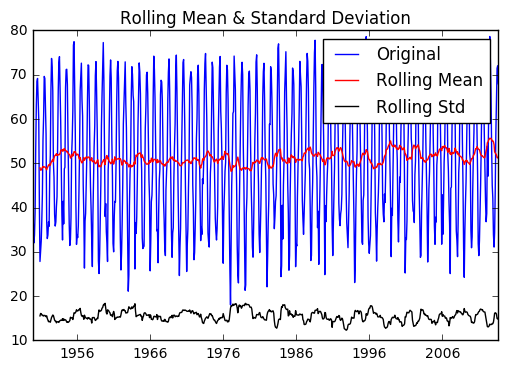

Results of Dickey-Fuller Test:
Test Statistic                -6.281558e+00
p-value                        3.785512e-08
#Lags Used                     1.800000e+01
Number of Observations Used    7.460000e+02
Critical Value (5%)           -2.865422e+00
Critical Value (1%)           -3.439146e+00
Critical Value (10%)          -2.568837e+00
dtype: float64


In [80]:
ts = chicago_post_1950['AverageTemperature_F']
test_stationarity(ts)

Visually, the TS looks to be stationary with constant mean and variance

From the results of the dickey-fuller test, we can reject the null hypothesis that the time series is 'non-stationary'

(405, 7)


/Users/mtetkosk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/mtetkosk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


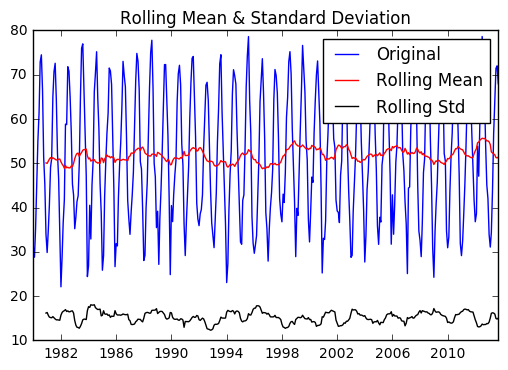

Results of Dickey-Fuller Test:
Test Statistic                  -5.556463
p-value                          0.000002
#Lags Used                      18.000000
Number of Observations Used    386.000000
Critical Value (5%)             -2.869057
Critical Value (1%)             -3.447405
Critical Value (10%)            -2.570774
dtype: float64


In [82]:
## Let's check for different year cutoffs
chicago_post_1980 = chicago_subset['1980-01-01 00:00:00': ].copy()
print chicago_post_1980.shape

ts = chicago_post_1980['AverageTemperature_F']
test_stationarity(ts)


This is also stationary according to dickey fuller test, however the p-value is much smaller when looking only after 1980.

(285, 7)


/Users/mtetkosk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/mtetkosk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


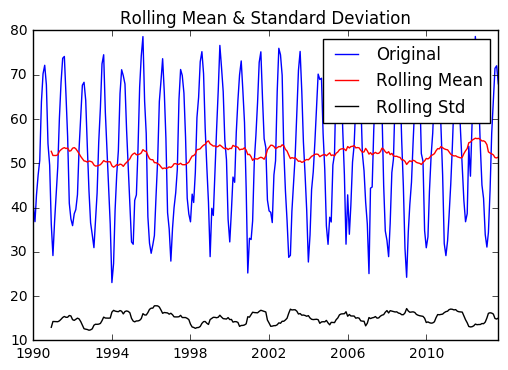

Results of Dickey-Fuller Test:
Test Statistic                  -3.635522
p-value                          0.005117
#Lags Used                      14.000000
Number of Observations Used    270.000000
Critical Value (5%)             -2.872305
Critical Value (1%)             -3.454804
Critical Value (10%)            -2.572506
dtype: float64


In [83]:
## Let's check for different year cutoffs
chicago_post_1990 = chicago_subset['1990-01-01 00:00:00': ].copy()
print chicago_post_1990.shape

ts = chicago_post_1990['AverageTemperature_F']
test_stationarity(ts)

Again post 1990 is stationary but p-value approaching critical value

(165, 7)


/Users/mtetkosk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/mtetkosk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


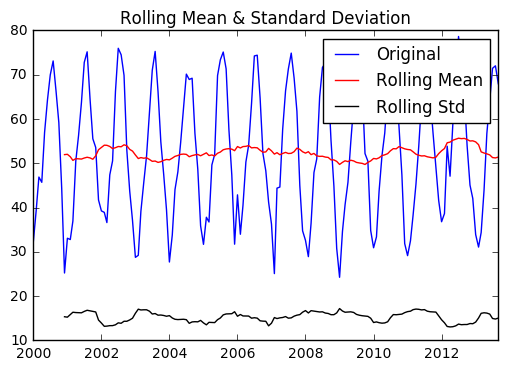

Results of Dickey-Fuller Test:
Test Statistic                  -3.477108
p-value                          0.008595
#Lags Used                      14.000000
Number of Observations Used    150.000000
Critical Value (5%)             -2.881009
Critical Value (1%)             -3.474715
Critical Value (10%)            -2.577151
dtype: float64


In [84]:
## Let's check for different year cutoffs
chicago_post_2000 = chicago_subset['2000-01-01 00:00:00': ].copy()
print chicago_post_2000.shape

ts = chicago_post_2000['AverageTemperature_F']
test_stationarity(ts)

In [ ]:
# Still stationary after 2000

In [87]:
#Let's export some of the subset data:
chicago_post_1950.to_csv('/Users/mtetkosk/Google Drive/School/Winter 2017/CSC 425/Project/Time_Series_Temp_Prediction/data/processed/Chicago_Post_1950.csv', index_col = False)
chicago_post_1980.to_csv('/Users/mtetkosk/Google Drive/School/Winter 2017/CSC 425/Project/Time_Series_Temp_Prediction/data/processed/Chicago_Post_1980.csv', index_col = False)
chicago_post_1990.to_csv('/Users/mtetkosk/Google Drive/School/Winter 2017/CSC 425/Project/Time_Series_Temp_Prediction/data/processed/Chicago_Post_1990.csv', index_col = False)
chicago_post_2000.to_csv('/Users/mtetkosk/Google Drive/School/Winter 2017/CSC 425/Project/Time_Series_Temp_Prediction/data/processed/Chicago_Post_2000.csv', index_col = False)

## Now let's create a time-series model for Chicago Temps Post-1950

In [94]:
# Decompose the time series into the trend, seasonal,and residual components

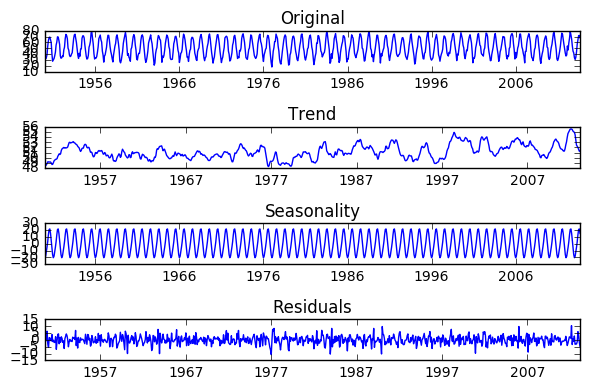

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts = chicago_post_1950['AverageTemperature_F']

decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts)
plt.title('Original')
plt.subplot(412)
plt.plot(trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(seasonal)
plt.title('Seasonality')
plt.subplot(414)
plt.plot(residual)
plt.title('Residuals')
plt.tight_layout()

/Users/mtetkosk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/mtetkosk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


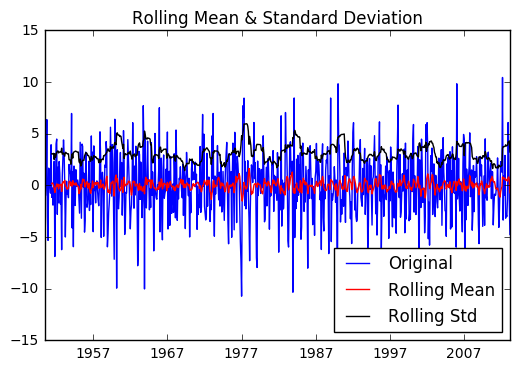

Results of Dickey-Fuller Test:
Test Statistic                -1.173651e+01
p-value                        1.303896e-21
#Lags Used                     1.900000e+01
Number of Observations Used    7.330000e+02
Critical Value (5%)           -2.865491e+00
Critical Value (1%)           -3.439303e+00
Critical Value (10%)          -2.568874e+00
dtype: float64


In [96]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

In [97]:
## The residuals are stationary.

In [123]:
from statsmodels.tsa.stattools import acf, pacf

In [124]:
import statsmodels.api as sm 

Plot the autocorrelation and partial auto-correlation of the detrended and seasonal adjusted variable

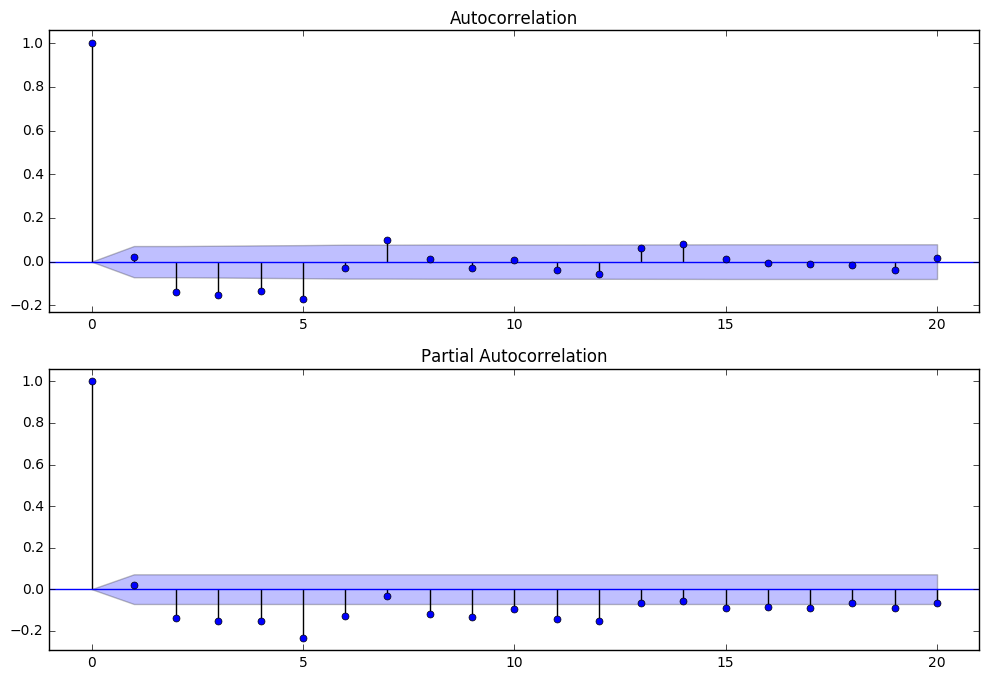

In [127]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_decompose, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_decompose, lags=20, ax=ax2)

From the ACF / PACF plots above and using the criteria below:

IF ACF(Yt) tails off, AND PACF(Yt) has non-zero values at lags at s, s+1 and multiple of s. 
	Fit a SARIMA model with regular AR(q) component and seasonal 	AR(Qs) component:
Adjust model (add/remove components) based on the ACF/PACF functions of residuals


I would choose a SARIMA model with regular AR(5) component and seasonal AR(5) component.